In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 128
BATCH_SIZE = 16
EPOCHS = 10

In [3]:
import tensorflow as tf
dataset_path = r"C:\Users\gowri\OneDrive\Desktop\plant vilage\PlantVillage"

selected_classes = ['Pepper__bell___Bacterial_spot',
                    'Pepper__bell___healthy',
                    ]
# Load only specified classes
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    class_names=selected_classes,
    image_size=(256, 256),
    batch_size=BATCH_SIZE  # Use the new lower batch size
)


# Display loaded class names
print("Loaded Classes:", dataset.class_names)

Found 2475 files belonging to 2 classes.
Loaded Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']


In [7]:
class_name = dataset.class_names
class_name

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

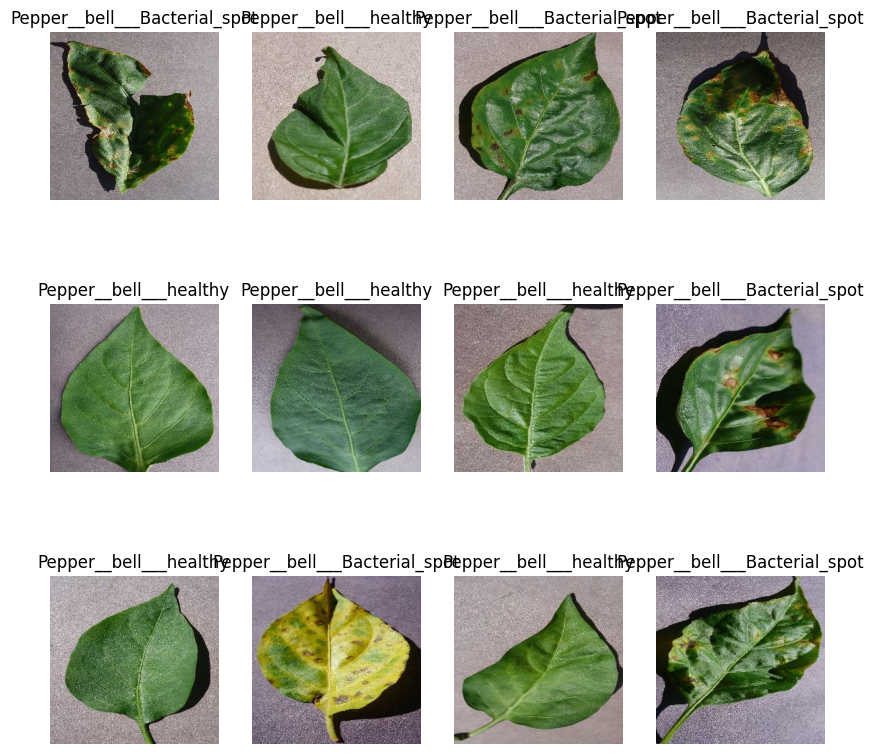

In [9]:
plt.figure(figsize= (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

In [10]:
train_size = 0.8
len(dataset)*train_size

124.0

In [13]:
train_ds = dataset.take(100)
len(train_ds)

100

In [15]:
test_ds = dataset.skip(100)
len(test_ds)

55

In [17]:
val_size = 0.1
len(dataset)*val_size

15.5

In [19]:
test_ds = test_ds.skip(14)
len(test_ds)

41

In [21]:
def get_dataset_partition_tf(ds, train_split = 0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size =  len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.take(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [25]:
len(train_ds)

124

In [27]:
len(val_ds)

15

In [29]:
len(test_ds)

16

In [31]:
train_ds = train_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [35]:
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),  # Normalize & define input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.GlobalAveragePooling2D(),  # Efficient downsampling
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # You have 10 classes
])


C:\Users\gowri\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=SparseCategoricalCrossentropy(from_logits=False),  # Correct loss for integer labels
    metrics=['accuracy']
)


In [39]:
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    verbose=1
)

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.5875 - loss: 0.6698 - val_accuracy: 0.7708 - val_loss: 0.5979
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7283 - loss: 0.5597 - val_accuracy: 0.7917 - val_loss: 0.4521
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.7947 - loss: 0.4415 - val_accuracy: 0.7958 - val_loss: 0.4089
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 125s 990ms/step - accuracy: 0.8302 - loss: 0.3812 - val_accuracy: 0.8375 - val_loss: 0.3399
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.8486 - loss: 0.3383 - val_accuracy: 0.8708 - val_loss: 0.3143
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 123s 982ms/step - accuracy: 0.8779 - loss: 0.3101 - val_accuracy: 0.8667 - val_loss: 0.3119
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 124s 985ms/step - accuracy: 0.8949 - loss: 0.2659 - val_accuracy: 0.8625 - val_loss: 0.2756
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 124s 986ms/step - accuracy: 0.8942 - loss: 0.264

In [45]:
# Save the entire model
model.save("pepper_bell_disease_model.h5")

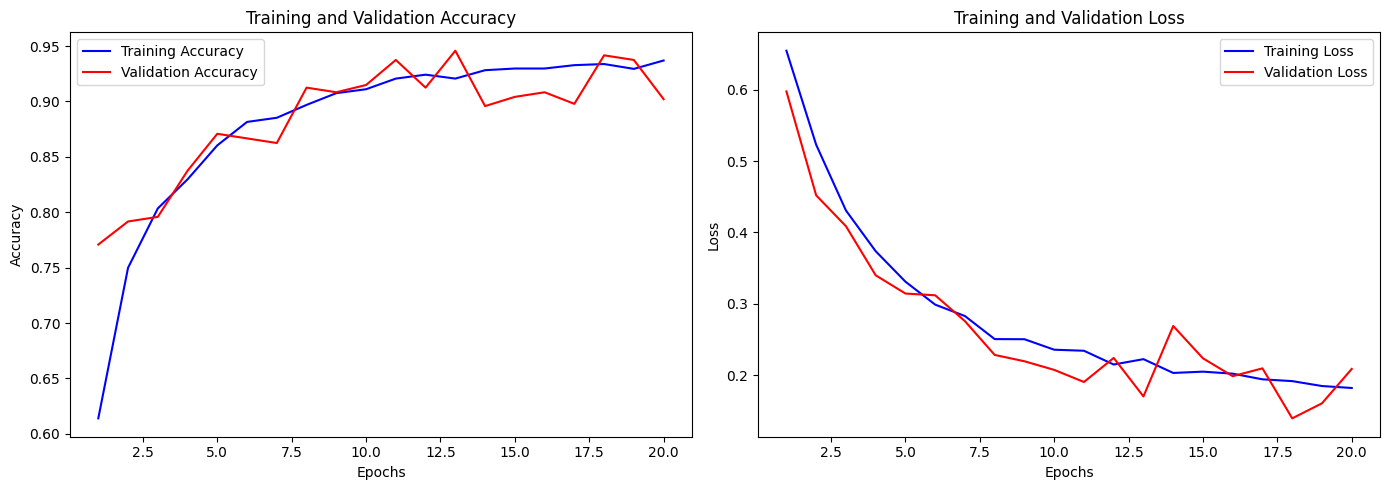

In [43]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your history object
plot_training_history(history)
